# DATA SCIENCE INTERNSHIP @BHARAT INTERN

## AUTHOR : VAIBHAV DIXIT

## TASK 1 : STOCK PREDICTION

PURPOSE : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

### ABOUT DATASET

### Google Stock Prediction

#### This dataset contains historical data of Google's stock prices and related attributes. It consists of 14 columns and a smaller subset of 1257 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.



### The columns in the dataset are as follows:

1. Symbol:  The name of the company, which is GOOG in this case.
2. Date:  The year and date of the stock data.
3. Close:  The closing price of Google's stock on a particular day.
4. High:  The highest value reached by Google's stock on the given day.
5. Low:  The lowest value reached by Google's stock on the given day.
6. Open:  The opening value of Google's stock on the given day.
7. Volume:  The trading volume of Google's stock on the given day, i.e., the number of shares traded.
8. adjClose:  The adjusted closing price of Google's stock, considering factors such as dividends and stock splits.
9. adjHigh:  The adjusted highest value reached by Google's stock on the given day.
10. adjLow:  The adjusted lowest value reached by Google's stock on the given day.
11. adjOpen:  The adjusted opening value of Google's stock on the given day.
12. adjVolume:  The adjusted trading volume of Google's stock on the given day, accounting for factors such as stock splits.
13. divCash:  The amount of cash dividend paid out to shareholders on the given day.
14. splitFactor:  The split factor, if any, applied to Google's stock on the given day. A split factor of 1 indicates no split.


The dataset is available at Kaggle : https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction

## STEP 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [1]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

C:\Users\Vaibhav\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Google Stocks.csv') # data_importing
df.head(10) # fetching first 10 rows of dataset

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0
5,GOOG,2016-06-21 00:00:00+00:00,695.94,702.77,692.0100,698.40,1465634,695.94,702.77,692.0100,698.40,1465634,0.0,1.0
6,GOOG,2016-06-22 00:00:00+00:00,697.46,700.86,693.0819,699.06,1184318,697.46,700.86,693.0819,699.06,1184318,0.0,1.0
7,GOOG,2016-06-23 00:00:00+00:00,701.87,701.95,687.0000,697.45,2171415,701.87,701.95,687.0000,697.45,2171415,0.0,1.0
8,GOOG,2016-06-24 00:00:00+00:00,675.22,689.40,673.4500,675.17,4449022,675.22,689.40,673.4500,675.17,4449022,0.0,1.0
9,GOOG,2016-06-27 00:00:00+00:00,668.26,672.30,663.2840,671.00,2641085,668.26,672.30,663.2840,671.00,2641085,0.0,1.0


## STEP 2 : GATHERING INSIGHTS

In [3]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (1258, 14)


In [4]:
# statistical description of data
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [5]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [6]:
# checking null values
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

### There are no null values in the dataset

In [7]:
df = df[['date','open','close']] # Extracting required columns
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


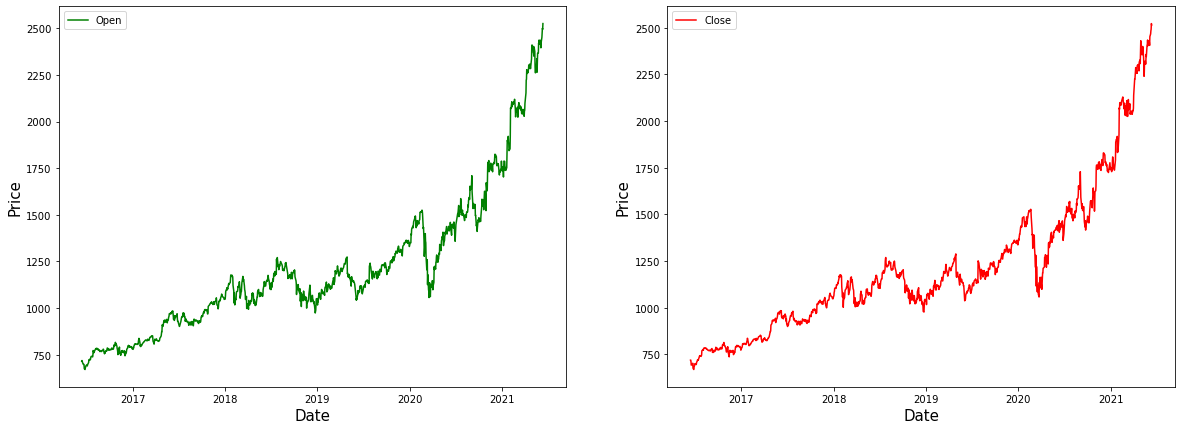

In [8]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()


## STEP 3 : DATA PRE-PROCESSING

In [9]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [10]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [11]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [12]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [13]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

## STEP 4 : CREATING LSTM MODEL

In [14]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 9s 104ms/step - loss: 0.0086 - mean_absolute_error: 0.0642 - val_loss: 0.0174 - val_mean_absolute_error: 0.1004
Epoch 2/100
28/28 [==============================] - 1s 44ms/step - loss: 7.1949e-04 - mean_absolute_error: 0.0205 - val_loss: 0.0050 - val_mean_absolute_error: 0.0541
Epoch 3/100
28/28 [==============================] - 1s 47ms/step - loss: 4.3778e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0050 - val_mean_absolute_error: 0.0561
Epoch 4/100
28/28 [==============================] - 1s 51ms/step - loss: 4.3576e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0054 - val_mean_absolute_error: 0.0582
Epoch 5/100
28/28 [==============================] - 1s 51ms/step - loss: 4.3431e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0050 - val_mean_absolute_error: 0.0557
Epoch 6/100
28/28 [==============================] - 1s 50ms/step - loss: 4.1116e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0069 - val_mean_absolute_error: 0.

28/28 [==============================] - 1s 45ms/step - loss: 2.1581e-04 - mean_absolute_error: 0.0108 - val_loss: 0.0026 - val_mean_absolute_error: 0.0413
Epoch 50/100
28/28 [==============================] - 1s 44ms/step - loss: 2.1621e-04 - mean_absolute_error: 0.0105 - val_loss: 0.0039 - val_mean_absolute_error: 0.0522
Epoch 51/100
28/28 [==============================] - 1s 47ms/step - loss: 2.1620e-04 - mean_absolute_error: 0.0109 - val_loss: 0.0017 - val_mean_absolute_error: 0.0312
Epoch 52/100
28/28 [==============================] - 1s 48ms/step - loss: 2.1186e-04 - mean_absolute_error: 0.0109 - val_loss: 0.0021 - val_mean_absolute_error: 0.0364
Epoch 53/100
28/28 [==============================] - 1s 47ms/step - loss: 2.2601e-04 - mean_absolute_error: 0.0113 - val_loss: 0.0013 - val_mean_absolute_error: 0.0271
Epoch 54/100
28/28 [==============================] - 1s 49ms/step - loss: 1.9233e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0015 - val_mean_absolute_error: 0.0293

28/28 [==============================] - 1s 43ms/step - loss: 1.1343e-04 - mean_absolute_error: 0.0077 - val_loss: 0.0020 - val_mean_absolute_error: 0.0373
Epoch 98/100
28/28 [==============================] - 1s 47ms/step - loss: 1.1278e-04 - mean_absolute_error: 0.0076 - val_loss: 7.4945e-04 - val_mean_absolute_error: 0.0211
Epoch 99/100
28/28 [==============================] - 1s 47ms/step - loss: 1.0835e-04 - mean_absolute_error: 0.0075 - val_loss: 0.0020 - val_mean_absolute_error: 0.0370
Epoch 100/100
28/28 [==============================] - 1s 47ms/step - loss: 1.2666e-04 - mean_absolute_error: 0.0080 - val_loss: 0.0023 - val_mean_absolute_error: 0.0392


In [16]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 1s 50ms/step - loss: 1.0782e-04 - mean_absolute_error: 0.0074 - val_loss: 0.0017 - val_mean_absolute_error: 0.0327
Epoch 2/100
28/28 [==============================] - 1s 46ms/step - loss: 1.0740e-04 - mean_absolute_error: 0.0074 - val_loss: 0.0017 - val_mean_absolute_error: 0.0326
Epoch 3/100
28/28 [==============================] - 1s 43ms/step - loss: 1.1113e-04 - mean_absolute_error: 0.0075 - val_loss: 0.0011 - val_mean_absolute_error: 0.0257
Epoch 4/100
28/28 [==============================] - 1s 48ms/step - loss: 1.1383e-04 - mean_absolute_error: 0.0076 - val_loss: 7.8888e-04 - val_mean_absolute_error: 0.0213
Epoch 5/100
28/28 [==============================] - 1s 43ms/step - loss: 1.1123e-04 - mean_absolute_error: 0.0075 - val_loss: 0.0017 - val_mean_absolute_error: 0.0332
Epoch 6/100
28/28 [==============================] - 1s 43ms/step - loss: 1.2244e-04 - mean_absolute_error: 0.0080 - val_loss: 0.0020 - val_mean_absolute_er

28/28 [==============================] - 1s 42ms/step - loss: 8.8142e-05 - mean_absolute_error: 0.0065 - val_loss: 0.0015 - val_mean_absolute_error: 0.0307
Epoch 50/100
28/28 [==============================] - 1s 43ms/step - loss: 9.9188e-05 - mean_absolute_error: 0.0071 - val_loss: 0.0012 - val_mean_absolute_error: 0.0276
Epoch 51/100
28/28 [==============================] - 1s 42ms/step - loss: 9.9426e-05 - mean_absolute_error: 0.0071 - val_loss: 0.0012 - val_mean_absolute_error: 0.0265
Epoch 52/100
28/28 [==============================] - 1s 45ms/step - loss: 8.8807e-05 - mean_absolute_error: 0.0065 - val_loss: 8.1863e-04 - val_mean_absolute_error: 0.0212
Epoch 53/100
28/28 [==============================] - 1s 46ms/step - loss: 9.7396e-05 - mean_absolute_error: 0.0069 - val_loss: 0.0015 - val_mean_absolute_error: 0.0306
Epoch 54/100
28/28 [==============================] - 1s 46ms/step - loss: 8.9950e-05 - mean_absolute_error: 0.0065 - val_loss: 0.0020 - val_mean_absolute_error: 0.

Epoch 97/100
28/28 [==============================] - 1s 47ms/step - loss: 9.1483e-05 - mean_absolute_error: 0.0067 - val_loss: 8.1894e-04 - val_mean_absolute_error: 0.0209
Epoch 98/100
28/28 [==============================] - 1s 50ms/step - loss: 8.0136e-05 - mean_absolute_error: 0.0060 - val_loss: 0.0012 - val_mean_absolute_error: 0.0265
Epoch 99/100
28/28 [==============================] - 1s 48ms/step - loss: 7.2059e-05 - mean_absolute_error: 0.0056 - val_loss: 9.9226e-04 - val_mean_absolute_error: 0.0235
Epoch 100/100
28/28 [==============================] - 1s 49ms/step - loss: 8.6508e-05 - mean_absolute_error: 0.0063 - val_loss: 0.0014 - val_mean_absolute_error: 0.0285


In [17]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 2s 16ms/step


array([[0.4042854 , 0.40376735],
       [0.4023951 , 0.40196466],
       [0.40013307, 0.39975297],
       [0.40780336, 0.4071796 ],
       [0.40826446, 0.40770763]], dtype=float32)

In [18]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1420.5127, 1416.5782],
       [1417.0083, 1413.2372],
       [1412.8147, 1409.1382],
       [1427.0348, 1422.9022],
       [1427.8896, 1423.8809]], dtype=float32)

## STEP 5 : VISUALIZING ACTUAL VS PREDICTED DATA

In [19]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [20]:
# Inversing normalization/scaling 
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1420.512695,1416.578247
2020-05-28,1396.86,1416.73,1417.008301,1413.237183
2020-05-29,1416.94,1428.92,1412.814697,1409.138184
2020-06-01,1418.39,1431.82,1427.034790,1422.902222
2020-06-02,1430.55,1439.22,1427.889648,1423.880859


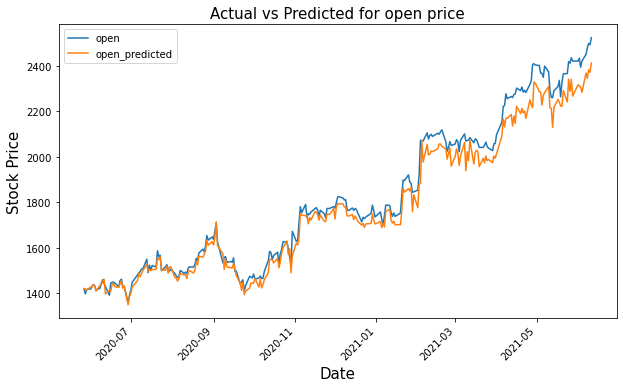

In [21]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()


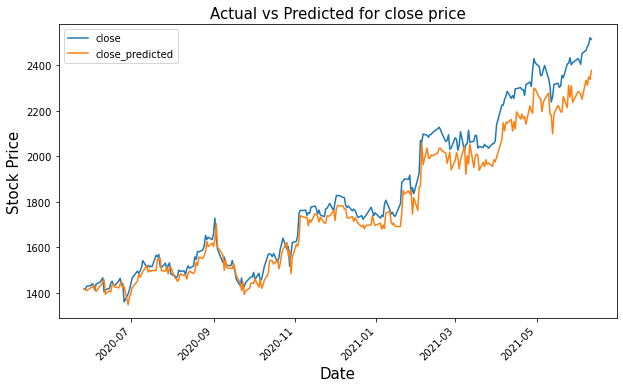

In [22]:
# plotting the actual close and predicted close prices on date index 
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()


## STEP 6. PREDICTING UPCOMING 10 DAYS

In [23]:
# Creating a dataframe and adding 10 days to existing index 

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.5,2491.4,2383.751465,2349.25708
2021-06-10,2494.01,2521.6,2372.625732,2337.964355
2021-06-11,2524.92,2513.93,2413.677246,2377.880859
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [24]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [25]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 42ms/step


In [26]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

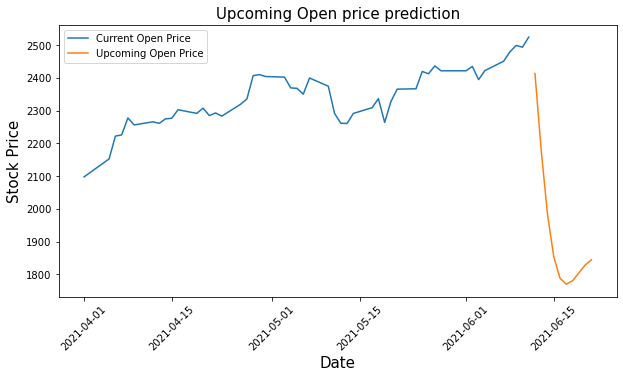

In [27]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()


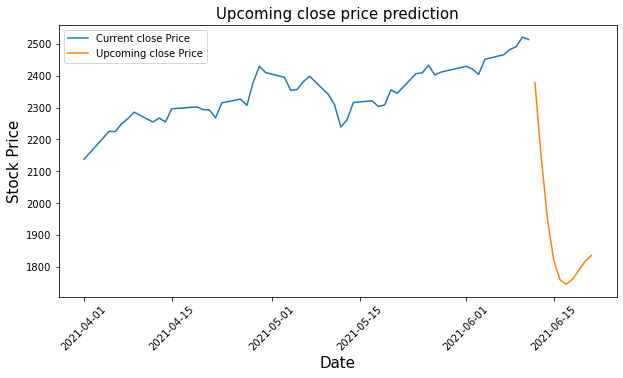

In [28]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()


# THANK YOU